<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/leogabac-Lab6/Lab6/leogabac_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Differential Equations**
**Leonardo Gabriel Alanis Cantú**

# **Abstract**

In this report, we will look at some basic numerical methods for solving Ordinary Differential equations, that can be used to solve Higher Order ODEs, and systems of ODEs. The first tasks consits on solving a scalar IVP, whereas the second is a System of IVPs solver. The method implemented in code is called the _Heun's method_, which is explained in greater detail in the introduction section. The solvers are put to test with some solved problems against their analytical solutions. There results were acceptable.

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [ ]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
from math import *
from numpy import mean

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

## The scalar IVP
Considering the following ODE for a scalar function $u: [0,T] \to \mathbb{R}$

$$
\dot{u}(t) = f(u(t),t)\\
u(0) = u_0
$$

We can solve it by time-stepping if we integrate both sides from $t_{n-1}$ to $t_n$ to get the following integral equation.

$$
u(t_n) = u(t_{n-1}) + \int_{t_{n-1}}^{t_n} f(u(t),t) \text{ d}t.
$$

Depending on how we decide to solve the integral, we will get a whole family of different methods. Using the trapezoidal rule

$$
\int_{t_{n-1}}^{t_n} f(u(t),t) \text{ d}t \approx \dfrac{h}{2}\left[ f(u_{n-1},t_{n-1}) + f(u_{n},t_{n}) \right],
$$

we get the _Trapezoidal rule_ for time-stepping.

$$
u_n = u_{n-1} + \dfrac{h}{2}\left[ f(u_{n-1},t_{n-1}) + f(u_{n},t_{n}) \right].
$$

Note that this is an implicit method, which requires to solve a root-finding problem at each step. One way of avoiding it is by replacing

$$
u_n = u_{n-1} + \dfrac{h}{2}\left[ f(u_{n-1},t_{n-1}) + f(\tilde{u}_{n},t_{n}) \right].
$$

where $\tilde{u}_n$ is an ansatz given by the forward Euler's method.

$$
\tilde{u}_n = u_{n-1} + hf(u_{n-1},t_{n-1}).
$$

This process is called _Heun's method_.

## Systems of IVPs
Here we consider the system of IVPs given as

$$
\dot{u} = (\dot{u}_1, \dot{u}_2, \ldots , \dot{u}_n )^\text{T}
$$

which represents a system of $n$ First order DE that can be solved symultaneously using the same methods as in the previous case. In this report (but time-stepping several equations instead of just one), the Heun's method will be implemented in both cases.

# **Method**

Heun's method for scalar IVP.

In [ ]:
def euler_ansatz(f,u_old,t_old,h):
    return u_old + h*f(u_old,t_old)

def heun(f,u0,t0,T,h = 0.1):
    # ===== INPUT ===== #
    # f: function-derivative
    # Initial condition
    # t0: Initial time
    # T: Final time
    # h: Step
    
    # ===== OUTPUT ===== #
    # Solutions as columns of a matrix.
    t = np.arange(t0,T+h,h)
    u = np.zeros(len(t))
    u[0] = u0
    
    for n in range(1,len(t)):
        u_tilde = euler_ansatz(f, u[n-1], t[n-1], h)
        add = f(u_tilde,t[n]) + f(u[n-1],t[n-1])
        u[n] = u[n-1] + 0.5*h*add
    
    return (t,u)

Systems of IVPs.

In [ ]:
def bigF(fv,u,t):
    # ===== INPUT ===== #
    # fv: Vector of function-derivatives
    # u: Vector of u's
    # t: time
    # ===== OUTPUT ===== #
    # [f1(u_1,...u_n,t), ... , fn(u_1,...u_n,t) ]
    return np.array([fi(u,t) for fi in fv])

def heun2(f,u0,t0,T,h = 0.1):
    # ===== INPUT ===== #
    # f: Vector of function-derivatives
    # u0: Vector of initial conditions
    # t0: Initial time
    # T: Final time
    # h: Step
    
    # ===== OUTPUT ===== #
    # Solutions as columns of a matrix.
    
    t = np.arange(t0,T+h,h)
    u = np.zeros((len(t), len(u0)))
    u[0] = u0
    
    for n in range(1,len(t)):
        u_tilde = euler_ansatz(f, u[n-1], t[n-1], h)
        add = f(u_tilde,t[n]) + f(u[n-1],t[n-1])
        u[n,:] = u[n-1,:] + 0.5*h*add
    
    return (t,u)

# **Results**

We will test accuracy of the method by solving analytical problems, in this first case the DE

$$
\dot{u} = \ln(t), \quad u(0) = -1
$$

with particular solution

$$
u(t) = t\ln(t) - t
$$

Note that we are using a quite big step size, just to test how _good enough_ the method can perform under these conditions.

Normed residual: 0.06841297241889623
Max residual: 0.01858718813171123
Min residual: 0.0
Mean residual: 0.014987563409612855


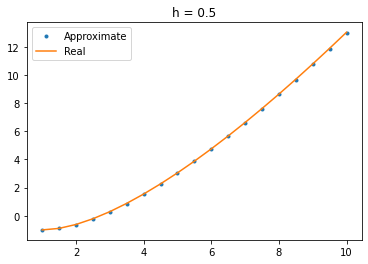

In [ ]:
def f(u,t):
    return log(t)

(t,u_approx) = heun(f, -1,1, 10, h = 0.5)
u_real = t * np.log(t) - t 

diff = abs(u_approx - u_real)

print("Normed residual:", np.linalg.norm(diff))
print("Max residual:", np.max(diff))
print("Min residual:", np.min(diff))
print("Mean residual:", np.mean(diff))

plt.plot(t,u_approx, 'o', markersize = 3)
plt.plot(t,u_real)
plt.title("h = 0.5")
plt.legend(["Approximate", "Real"])
plt.show()

Just for reference, we can test with some other step sizes

Normed residual: 0.5597765342463774
Max residual: 0.27658287299621875
Min residual: 0.0
Mean residual: 0.20726182220579806


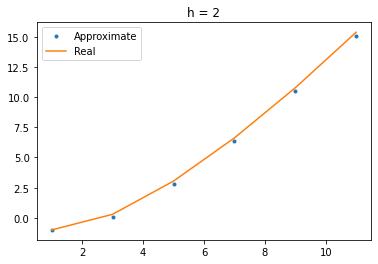

In [ ]:
(t,u_approx) = heun(f, -1,1, 10, h = 2)
u_real = t * np.log(t) - t 

diff = abs(u_approx - u_real)

print("Normed residual:", np.linalg.norm(diff))
print("Max residual:", np.max(diff))
print("Min residual:", np.min(diff))
print("Mean residual:", np.mean(diff))

plt.plot(t,u_approx, 'o', markersize = 3)
plt.plot(t,u_real)
plt.title("h = 2")
plt.legend(["Approximate", "Real"])
plt.show()

Normed residual: 0.00019182667910589966
Max residual: 7.4999722610158415e-06
Min residual: 0.0
Mean residual: 6.198555582607999e-06


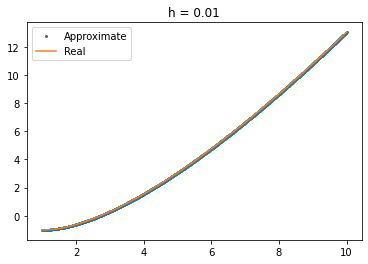

In [ ]:
(t,u_approx) = heun(f, -1,1, 10, h = 0.01)
u_real = t * np.log(t) - t 

diff = abs(u_approx - u_real)

print("Normed residual:", np.linalg.norm(diff))
print("Max residual:", np.max(diff))
print("Min residual:", np.min(diff))
print("Mean residual:", np.mean(diff))

plt.plot(t,u_approx, 'o', markersize = 2)
plt.plot(t,u_real)
plt.title("h = 0.01")
plt.legend(["Approximate", "Real"])
plt.show()

To test a system of IVPs we will look at the 2nd order ODE of the Classical Harmonic Oscillator

$$
\ddot{u} + \dfrac{k}{m}u = 0, \quad u(0) = u_0, \dot{u}(0) = v_0.
$$

We can treat this problem as a system of two ODEs that must be solved simultaneously.

$$
\dot{u} = v, \quad u(0) = u_0\\
\dot{v} = -\dfrac{k}{m}, \quad \dot{u}(0) = v_0.
$$

with solution

$$
u(t) = u_0 \cos(\omega t) + \dfrac{v_0}{\omega}\sin(\omega t), \quad \omega = \sqrt{k/m}
$$

Normed residual: 1.188543227407857
Max residual: 0.5549887369298097
Min residual: 0.0
Mean residual: 0.20141413950727904


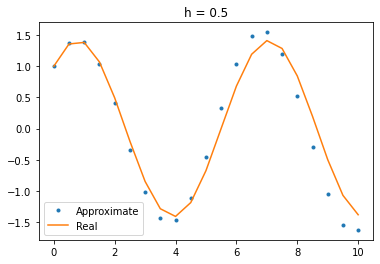

In [ ]:
(k,m) = (3,3)
omega = sqrt(k/m)

def f1(u,t):
    return u[1]

def f2(u,t):
    return -(k/m)*u[0]

def f(u,t):
    return bigF([f1,f2], u ,t)

initial_conditions = [1,1]
(t, u_approx) = heun2(f, initial_conditions, 0, 10, h = 0.5)

x_approx = u_approx[:,0]
x_real = initial_conditions[0]*np.cos(omega*t) + (initial_conditions[1]/omega)*np.sin(omega*t)

diff = abs(x_approx - x_real)

print("Normed residual:", np.linalg.norm(diff))
print("Max residual:", np.max(diff))
print("Min residual:", np.min(diff))
print("Mean residual:", np.mean(diff))

plt.plot(t,x_approx, 'o', markersize = 3)
plt.plot(t,x_real)
plt.title("h = 0.5")
plt.legend(["Approximate", "Real"])
plt.show()

And some other tests.

Normed residual: 79.91317210208834
Max residual: 77.61690736003418
Min residual: 0.0
Mean residual: 18.031449608719647


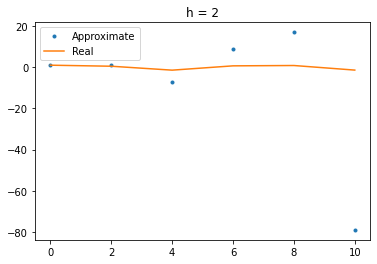

In [ ]:
initial_conditions = [1,1]
(t, u_approx) = heun2(f, initial_conditions, 0, 10, h = 2)

x_approx = u_approx[:,0]
x_real = initial_conditions[0]*np.cos(omega*t) + (initial_conditions[1]/omega)*np.sin(omega*t)

diff = abs(x_approx - x_real)

print("Normed residual:", np.linalg.norm(diff))
print("Max residual:", np.max(diff))
print("Min residual:", np.min(diff))
print("Mean residual:", np.mean(diff))

plt.plot(t,x_approx, 'o', markersize = 3)
plt.plot(t,x_real)
plt.title("h = 2")
plt.legend(["Approximate", "Real"])
plt.show()

Normed residual: 0.003118349474173584
Max residual: 0.00020515356882208624
Min residual: 0.0
Mean residual: 7.743305438876663e-05


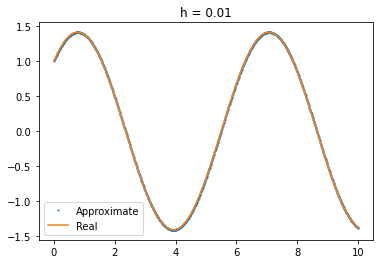

In [ ]:
initial_conditions = [1,1]
(t, u_approx) = heun2(f, initial_conditions, 0, 10, h = 0.01)

x_approx = u_approx[:,0]
x_real = initial_conditions[0]*np.cos(omega*t) + (initial_conditions[1]/omega)*np.sin(omega*t)

diff = abs(x_approx - x_real)

print("Normed residual:", np.linalg.norm(diff))
print("Max residual:", np.max(diff))
print("Min residual:", np.min(diff))
print("Mean residual:", np.mean(diff))

plt.plot(t,x_approx, 'o', markersize = 1)
plt.plot(t,x_real)
plt.title("h = 0.01")
plt.legend(["Approximate", "Real"])
plt.show()

# **Discussion**

In this report, we looked primarily at the Heun's method for solving IVPs of Differential Equations. Generally speaking, the implemented code and the method impressed me a lot. At first glance we can consider it "A slight modification of Euler's method", and I did not expect really good results.

As seen in the scalar test, the method is really accurate and stable, even for big step sizes. This is more likely to be consequence of the nature of the ODE. Note how the solution on the interval is a monotonically increasing function, i.e. it does not vary much, and can only increase. This behaviour makes it fairly easy for the method to have such good stability.

The complete opposite happens in the System of IVPs, since we tested with an oscillatory function, with fairly big step sizes, the algorithm looses accuracy really fast; in fact, notice how the greater the frequency of oscillation, it deviates highly from the true solution.

Normed residual: 9.886904167793887
Max residual: 5.450881873528636
Min residual: 0.0
Mean residual: 1.5723561066446838


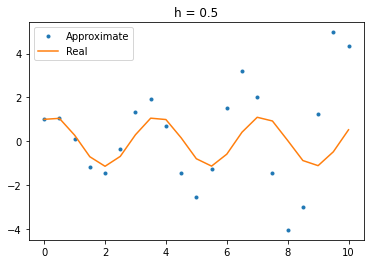

In [ ]:
(k,m) = (10,3)
omega = sqrt(k/m)

def f1(u,t):
    return u[1]

def f2(u,t):
    return -(k/m)*u[0]

def f(u,t):
    return bigF([f1,f2], u ,t)

initial_conditions = [1,1]
(t, u_approx) = heun2(f, initial_conditions, 0, 10, h = 0.5)

x_approx = u_approx[:,0]
x_real = initial_conditions[0]*np.cos(omega*t) + (initial_conditions[1]/omega)*np.sin(omega*t)

diff = abs(x_approx - x_real)

print("Normed residual:", np.linalg.norm(diff))
print("Max residual:", np.max(diff))
print("Min residual:", np.min(diff))
print("Mean residual:", np.mean(diff))

plt.plot(t,x_approx, 'o', markersize = 3)
plt.plot(t,x_real)
plt.title("h = 0.5, k =10")
plt.legend(["Approximate", "Real"])
plt.show()

The moral of these experiments, is that not only the step size plays a role in the accurace (As seen in class on the study of error), but also the behaviour affects on how small errors evolve over time.

Finally, just for the fun of it. I wanted to solve the Lorenz attractor system of equations

$$
\begin{aligned}
\frac{\mathrm{d} x}{\mathrm{~d} t} &=\sigma(y-x) \\
\frac{\mathrm{d} y}{\mathrm{~d} t} &=x(\rho-z)-y \\
\frac{\mathrm{d} z}{\mathrm{~d} t} &=x y-\beta z
\end{aligned}
$$

Note how on this chaotic system, even if we use $h=0.1$. It completely blows up

In [ ]:
sigma = 10
beta = 8/3
rho = 28

def f1(u,t):
    return sigma*(u[1] - u[0])

def f2(u,t):
    return u[0]*(rho - u[2]) - u[1]

def f3(u,t):
    return u[0]*u[1] - beta*u[2]

def f(u,t):
    return bigF([f1,f2,f3], u ,t)

initial_conditions = [1,2,3]
(t, u_approx) = heun2(f, initial_conditions, 0, 50, h = 0.1)


c:\users\leoga\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
c:\users\leoga\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
c:\users\leoga\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
c:\users\leoga\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in add
  


But being a bit more careful, we can reproduce the expected results.

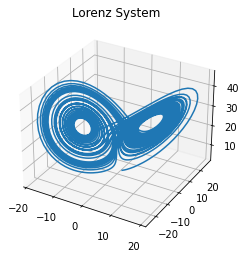

In [ ]:
initial_conditions = [1,2,3]
(t, u_approx) = heun2(f, initial_conditions, 0, 50, h = 0.01)

x = u_approx[:,0]
y = u_approx[:,1]
z = u_approx[:,2]

ax = plt.axes(projection = '3d')
ax.plot(x, y, z)
plt.title('Lorenz System')
plt.show()